# Bab 1: Introduction

Name: Allen

Batch: FTDS_BSD_003

Dataset: `Hotel Reservation Datasets`

Problem Statement:
The Hotel Reservation Project is to explore customer activity related to their booking and reservation status. The main or the output of this project is aimed to predict whether the customer will cancel their booking or not. The online hotel reservation have developed their booking process but they have also brought some challanges like the typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. This modeling is useful for hotels to manage a problem like this and to reduce and minimalize the business loss. The dataset includes various features such as the number of adults and children, lead time, room type, and more. So at last the target feature in this dataset `booking_status`, which has two categories: "Not_Canceled" and "Canceled."


# Bab 2: Import Library

In [91]:
# Import Library
import numpy as np
import pandas as pd
import pickle
import phik
from phik import resources, report
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, precision_score,recall_score,accuracy_score,f1_score

# Bab 3: Data Loading

In [2]:
#Untuk mengeload data set
df_ori=pd.read_csv('hotel_reservations.csv')


#Membuat Duplicate df_ori
df=df_ori.copy()

#Tampilkan 5 data ter atas
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


For starting analys this dataset let us know deeper about all columns in the dataset :
   -  no_of_adults: The number of adults in the reservation (categorical: 5 values)
   - no_of_children: The number of children in the reservation (categorical: 6 values)
   - no_of_weekend_nights: The number of weekend nights included in the reservation (categorical: 8 values)
   - no_of_week_nights: The number of weeknights included in the reservation (categorical: 18 values)
   - type_of_meal_plan: The type of meal plan chosen (categorical: 4 values)
   - required_car_parking_space: Whether a car parking space is required (binary: 2 values)
   - room_type_reserved: The type of room reserved (categorical: 7 values)
   - lead_time: The number of days between booking and arrival (numerical: range up to 352 days)
   - arrival_year: The year of arrival (categorical: 2 values)
   - arrival_month: The month of arrival (categorical: 12 values)
   - arrival_date: The day of arrival (categorical: 31 values)
   - market_segment_type: The type of market segment (categorical: 5 values)
   - repeated_guest: Whether the guest is a repeated customer (binary: 2 values)
   - no_of_previous_cancellations: The number of previous cancellations by the guest (categorical: 9 values)
   - no_of_previous_bookings_not_canceled: The number of previous bookings not canceled by the guest (numerical: range up to 59)
   - avg_price_per_room: The average price per room (numerical: range up to 3930)
   - no_of_special_requests: The number of special requests made by the guest (categorical: 6 values)
   - booking_status: The target variable, indicating whether the reservation was canceled or not (binary: 2 values)

In [3]:
# Checking all data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
# Show Unique Value
df.Booking_ID.unique()     

array(['INN00001', 'INN00002', 'INN00003', ..., 'INN36273', 'INN36274',
       'INN36275'], dtype=object)

In [5]:
# Show Unique Value
df.no_of_adults.unique()                         

array([2, 1, 3, 0, 4], dtype=int64)

In [6]:
# Show Unique Value
df.no_of_children.unique()                         

array([ 0,  2,  1,  3, 10,  9], dtype=int64)

In [7]:
# Show Unique Value
df.no_of_weekend_nights.unique()   

array([1, 2, 0, 4, 3, 6, 5, 7], dtype=int64)

In [8]:
# Show Unique Value
df.no_of_week_nights.unique()   

array([ 2,  3,  1,  4,  5,  0, 10,  6, 11,  7, 15,  9, 13,  8, 14, 12, 17,
       16], dtype=int64)

In [9]:
# Show Unique Value
df.type_of_meal_plan.unique()  

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [10]:
# Show Unique Value
df.required_car_parking_space.unique()

array([0, 1], dtype=int64)

In [11]:
# Show Unique Value
df.room_type_reserved.unique()  

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [12]:
# Show Unique Value
df.lead_time.unique()  

array([224,   5,   1, 211,  48, 346,  34,  83, 121,  44,   0,  35,  30,
        95,  47, 256,  99,  12, 122,   2,  37, 130,  60,  56,   3, 107,
        72,  23, 289, 247, 186,  64,  96,  41,  55, 146,  32,  57,   7,
       124, 169,   6,  51,  13, 100, 139, 117,  39,  86,  19, 192, 179,
        26,  74, 143, 177,  18, 267, 155,  46, 128,  20,  40, 196, 188,
        17, 110,  68,  73,  92, 171, 134, 320, 118, 189,  16,  24,   8,
        10, 182, 116, 123, 105, 443, 317, 286, 148,  14,  85,  25,  28,
        80,  11, 162,  82,  27, 245, 266, 112,  88,  69, 273,   4,  97,
        31,  62, 197, 280, 185, 160, 104,  22, 292, 109, 126, 303,  81,
        54,  15, 161, 147,  87, 127, 418, 156,  58, 433, 111, 195, 119,
        59,  78, 335, 103,  70,  76, 144,  49,  77,  36,  79,  21,  33,
       164, 152,  43, 102,  71, 209,  93,  53, 302, 239,  45, 167, 113,
        84,   9, 166, 174,  61, 151,  52,  67, 282,  38, 175,  89, 133,
        65,  66,  50, 159, 386, 115, 237, 125,  91,  29, 221, 21

In [13]:
# Show Unique Value
df.arrival_year.unique()  

array([2017, 2018], dtype=int64)

In [14]:
# Show Unique Value
df.arrival_month.unique()  

array([10, 11,  2,  5,  4,  9, 12,  7,  6,  8,  3,  1], dtype=int64)

In [15]:
# Show Unique Value
df.arrival_date.unique()  

array([ 2,  6, 28, 20, 11, 13, 15, 26, 18, 30,  5, 10,  4, 25, 22, 21, 19,
       17,  7,  9, 27,  1, 29, 16,  3, 24, 14, 31, 23,  8, 12],
      dtype=int64)

In [16]:
# Show Unique Value
df.market_segment_type.unique()  

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [17]:
# Show Unique Value
df.repeated_guest.unique()  

array([0, 1], dtype=int64)

In [18]:
# Show Unique Value
df.no_of_previous_cancellations.unique()  

array([ 0,  3,  1,  2, 11,  4,  5, 13,  6], dtype=int64)

In [19]:
# Show Unique Value
df.no_of_previous_bookings_not_canceled.unique()  

array([ 0,  5,  1,  3,  4, 12, 19,  2, 15, 17,  7, 20, 16, 50, 13,  6, 14,
       34, 18,  8, 10, 23, 11, 49, 47, 53,  9, 33, 22, 24, 52, 21, 48, 28,
       39, 25, 31, 38, 26, 51, 42, 37, 35, 56, 44, 27, 32, 55, 45, 30, 57,
       46, 54, 43, 58, 41, 29, 40, 36], dtype=int64)

In [20]:
# Show Unique Value
df.avg_price_per_room.unique()  

array([ 65.  , 106.68,  60.  , ..., 118.43, 137.25, 167.8 ])

In [21]:
# Show Unique Value
df.no_of_special_requests.unique()  

array([0, 1, 3, 2, 4, 5], dtype=int64)

In [22]:
# Show Unique Value
df.booking_status.unique()  

array(['Not_Canceled', 'Canceled'], dtype=object)

From information above, we can conclude that we have 3 type of data columns:
1. Numerical Columns: it means that these is real numerical columns
2. Categorical Columns: it means that these columns have type data object
3. Categorical Numeric Columns: it means that it is actually categorical columns in the form of numerical columns

Now we will defined every type data columns:
1. Numerical Columns: 
- `no_of_adults`,
- `no_of_children`,
- `no_of_weekend_nights`,
- `no_of_week_nights`,
- `lead_time`,
- `arrival_year`,
- `arrival_month`,
- `arrival_date`,
- `no_of_previous_cancellations`,and 
- `avg_price_per_room`

2. Categorical Columns: 
- `Booking_ID`,
- `type_of_meal_plan`, 
- `room_type_reserved`,
- `market_segment_type`, and 
- `booking_status`

3. Categorical Numeric Columns: 
- `required_car_parking_space`,
- `repeated_guest`, and 
- `no_of_special_requests`

In [23]:
#Show All Columns
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [24]:
# Show the row and the columns
df.shape

(36275, 19)

In [25]:
# show unique value
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [26]:
# looking data mean std min median max
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [27]:
# Looking isnull of the data 
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [28]:
# show data duplicated
df.duplicated().sum()

0

# Bab 4: Exploratory Data Analysis (EDA)

In this section we will look at the correlation between `type of meal plan`, `market sgement type`, and `room type` of the hotel visitos with the target `booking status`

In [29]:
# Create the DataFrame description
print('Description of the Categorical Dataset:')
print("=" * 40)
categorical_description = df.describe(include=['object', 'bool']).T

# Define a styling function
def style_description(s):
    return f'background-color: blue; font-weight: bold;'

# Apply the styling to the DataFrame
styled_description = categorical_description.style.applymap(style_description)
styled_description

Description of the Categorical Dataset:


,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


Now lets make a visualization about the information above

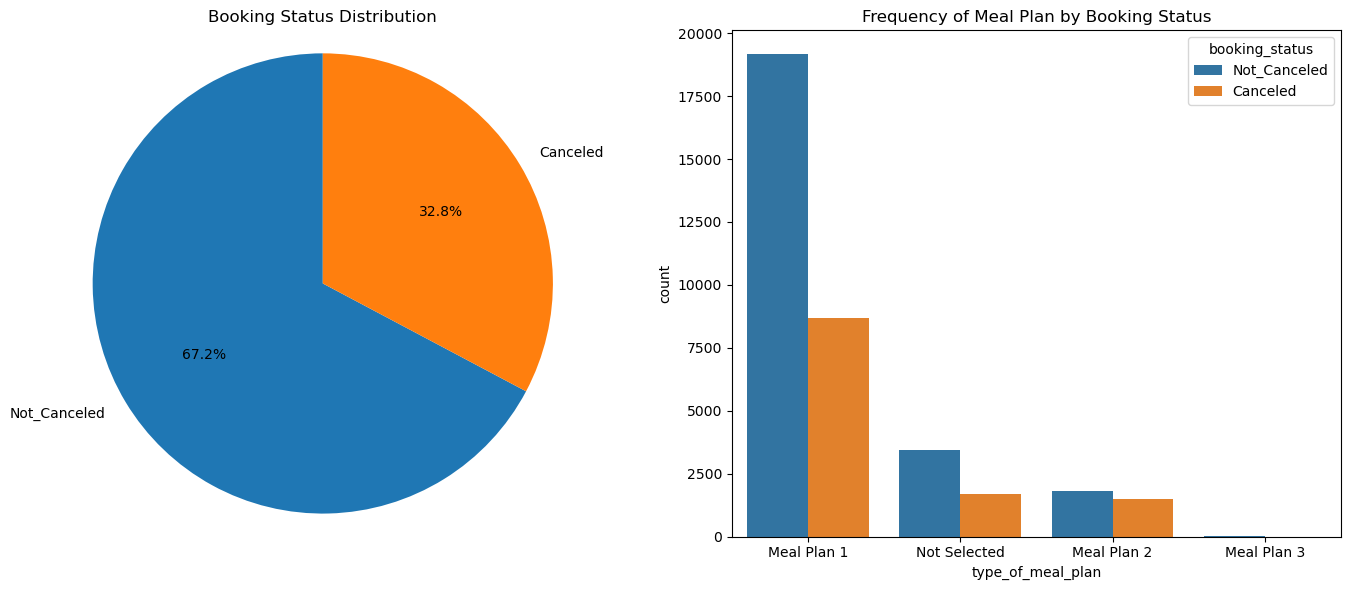

In [30]:
# Create subplots in a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Booking Status Distribution (Pie Chart)
booking_status_counts = df['booking_status'].value_counts()
labels = booking_status_counts.index
sizes = booking_status_counts.values

axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Booking Status Distribution')
axes[0].axis('equal')  # Equal aspect ratio ensures that the pie chart is circular

# Plot 2: Frequency of Meal Plan by Booking Status (Countplot)
sns.countplot(data=df, x="type_of_meal_plan", hue="booking_status", ax=axes[1])
axes[1].set_title('Frequency of Meal Plan by Booking Status')

# Display the plots in a tight layout
plt.tight_layout()
plt.show()

From information above we can take an information that visitors that not canceled their booking is bigger than canceled their booking `67.2%` to `32.8%`. We can take a look the comparison between the visitors that not canceled and canceled in how they chose meal plan, the meal plan 1 is occupied the first place than followed by not selected meal, than meal plan 2.

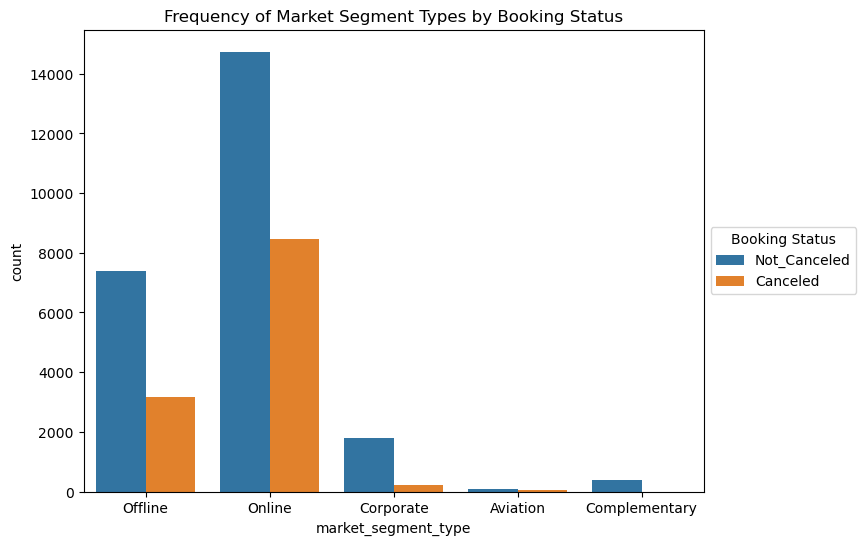

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="market_segment_type", hue="booking_status")
plt.title('Frequency of Market Segment Types by Booking Status')
plt.legend(title="Booking Status", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

Looking into the information above we know that market segment of booking status `online` booking status occupied the first place or most often did by visitors that not canceled and canceled booking status than followed by `ofline` for sencond place, corporate in the third place, aviation, and complementary in the last position

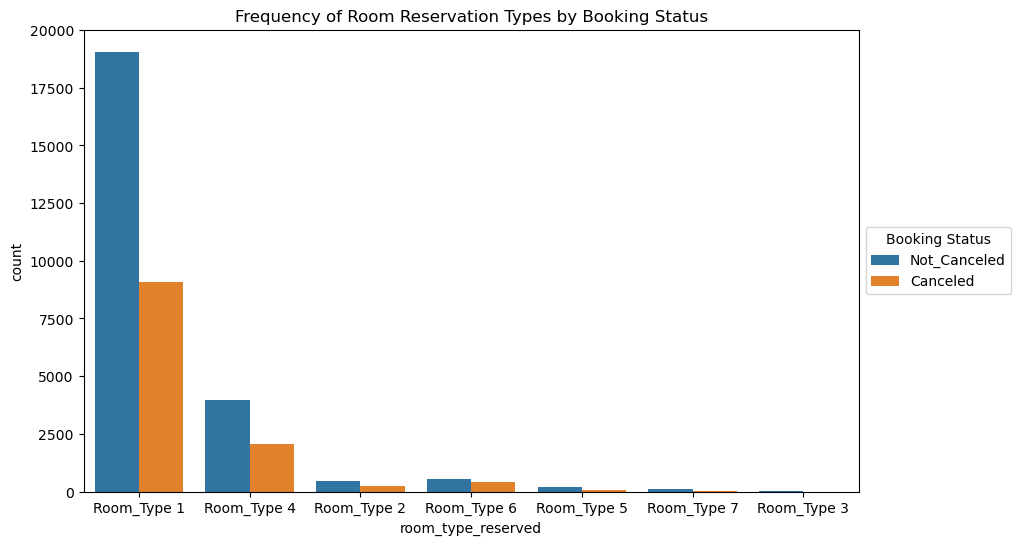

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="room_type_reserved", hue="booking_status")
plt.title('Frequency of Room Reservation Types by Booking Status')
plt.legend(title="Booking Status", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

From the information above `Room type 1` is the highest room type reserved by booking status and then the second popular is `Room type 4`

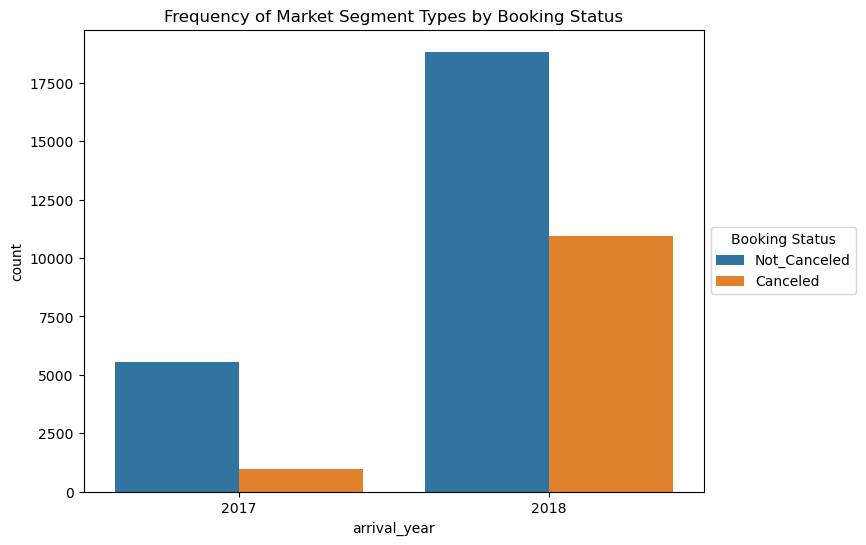

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="arrival_year", hue="booking_status")
plt.title('Frequency of Market Segment Types by Booking Status')
plt.legend(title="Booking Status", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

From information above visitors activity in reservation hotel most happend in `2018`

<Axes: xlabel='booking_status', ylabel='count'>

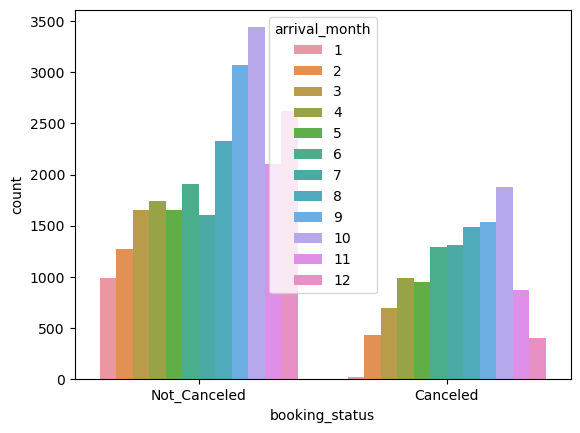

In [34]:
sns.countplot(data=df, x='booking_status', hue='arrival_month')

From information above we can look that booking hotel reservation most happened on `October`. it is asumpt that whay not canceld in that month more than canceled because it is close to the end of year holidays

---

# Bab 5: Feature Engineering

In this section we want to take a look the distribution of our dataset

In [35]:
# Untuk melihat data balancing
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

We have to encode our target into numerical columns using label Encoder because we want the value of the target in range (0,1)

In [36]:
label_encoder= preprocessing.LabelEncoder()
df['booking_status']= label_encoder.fit_transform(df['booking_status'])
df['booking_status'].unique()

array([1, 0])

it looks like that our dataset is imbalance dataset but the gap is about 60% to 40% so here in this project i dont use SMOTE to handle the imbalance data, so in this project we willnot focuses on metric accuracy to determine the prediction because of imbalance dataset, but we can still use metrics recall, precision, and F1_score as the best metric that can be used as the combination of recall and precision.

In [37]:
# Show Unique Value of All data columns
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

Now in this section we will drop Booking ID with a lot of unique value and not have a correlation with target

In [38]:
# Droping column
df= df.drop(['Booking_ID'], axis =1)

Here we will also drop column `arrival_year` because the unique value only 2 and it will make an eror correlation with the target if we dont drop it 

In [39]:
# Droping column
df= df.drop(['arrival_year'], axis =1)

In [40]:
# Show number row and columns after droping Booking ID
df.shape

(36275, 17)

In [41]:
# Set Phik Correlation
phik_matrix= df.phik_matrix()
corr= phik_matrix['booking_status'].sort_values(ascending= False)

#Display Results
corr

interval columns not set, guessing: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


booking_status                          1.000000
lead_time                               0.567900
no_of_special_requests                  0.358571
arrival_month                           0.224787
avg_price_per_room                      0.222650
repeated_guest                          0.167245
no_of_week_nights                       0.137998
required_car_parking_space              0.134456
type_of_meal_plan                       0.131484
market_segment_type                     0.122171
no_of_weekend_nights                    0.101977
no_of_adults                            0.078562
no_of_previous_bookings_not_canceled    0.073844
no_of_children                          0.051908
no_of_previous_cancellations            0.039806
room_type_reserved                      0.035153
arrival_date                            0.026595
Name: booking_status, dtype: float64

Based on the information above we can drop the columns that have weak correlation like below `0,1` correlation with the target, like `no_of_adults`,`no_of_previous_bookings_not_canceled`,`no_of_children`,`no_of_previous_cancellations`,`room_type_reserved`,and `arrival_date`

In [42]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [43]:
df= df.drop(['no_of_adults','no_of_children','no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled','room_type_reserved','arrival_date'], axis =1)

---

In [44]:
# Splitting antara x and y
X= df.drop(['booking_status'], axis =1)
# X= df_new.drop(columns=['booking_status'])
y= df.booking_status
# y= df_new['booking_status']

In [45]:
X

,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_month,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests
0,1,2,Meal Plan 1,0,224,10,Offline,0,65.00,0
1,2,3,Not Selected,0,5,11,Online,0,106.68,1
2,2,1,Meal Plan 1,0,1,2,Online,0,60.00,0
3,0,2,Meal Plan 1,0,211,5,Online,0,100.00,0
4,1,1,Not Selected,0,48,4,Online,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...
36270,2,6,Meal Plan 1,0,85,8,Online,0,167.80,1
36271,1,3,Meal Plan 1,0,228,10,Online,0,90.95,2
36272,2,6,Meal Plan 1,0,148,7,Online,0,98.39,2
36273,0,3,Not Selected,0,63,4,Online,0,94.50,0


In [47]:
y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int32

In [48]:
# Split data train dan juga test temp 80 % dan 20% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=10)

# Split temp set into test dan inference set 95% test 5% inference
X_test, X_inference, y_test, y_inference = train_test_split(X_temp, y_temp, test_size=0.05, random_state=10)

#print data frame untuk mendapatkan kolom dan baris yang sudah di split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_inference shape:", X_inference.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_inference shape:", y_inference.shape)

X_train shape: (27206, 10)
X_test shape: (8615, 10)
X_inference shape: (454, 10)
y_train shape: (27206,)
y_test shape: (8615,)
y_inference shape: (454,)


In [49]:
# show Xtrain
X_train.head()

,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_month,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests
18478,0,3,Meal Plan 1,0,20,9,Online,0,136.67,2
11575,1,4,Meal Plan 1,0,11,7,Offline,0,85.00,0
36108,2,2,Meal Plan 1,0,24,12,Online,0,95.20,1
23151,0,2,Meal Plan 1,0,188,6,Offline,0,130.00,0
19377,1,0,Meal Plan 1,0,286,10,Offline,0,90.00,0


In [50]:
# show ytrain
y_train.head()

18478    1
11575    1
36108    1
23151    0
19377    0
Name: booking_status, dtype: int32

In [51]:
# Show Xtest
X_test.head()

,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_month,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests
3052,2,3,Meal Plan 1,0,241,10,Online,0,150.45,1
1124,0,3,Not Selected,0,15,4,Online,0,117.67,0
4052,1,2,Not Selected,0,13,10,Online,0,140.00,2
29035,0,2,Meal Plan 1,0,4,12,Online,0,62.37,0
22362,2,9,Meal Plan 2,0,5,2,Online,0,146.00,0


In [52]:
# Show ytest
y_test.head()

3052     0
1124     0
4052     1
29035    1
22362    0
Name: booking_status, dtype: int32

In [53]:
# Check Class Distribution in Test-Set
np.array(np.unique(y_test, return_counts=True)).T

array([[   0, 2858],
       [   1, 5757]], dtype=int64)

0 = Canceled
1 = Not Canceled

In [54]:
X_train.columns

Index(['no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'lead_time', 'arrival_month',
       'market_segment_type', 'repeated_guest', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')

### Check Cardinality for (Categorical and Categorical Numerical Columns)

In [55]:
# untuk mengecek cardinality
print('Number of categories in the variable type_of_meal_plan     : {}'.format(len(df.type_of_meal_plan.unique())))
print('Number of categories in the variable required_car_parking_space     : {}'.format(len(df.required_car_parking_space.unique())))
print('Number of categories in the variable market_segment_type    : {}'.format(len(df.market_segment_type.unique())))
print('Number of categories in the variable repeated_guest : {}'.format(len(df.repeated_guest.unique())))
print('Number of categories in the variable no_of_special_requests : {}'.format(len(df.no_of_special_requests.unique())))

Number of categories in the variable type_of_meal_plan     : 4
Number of categories in the variable required_car_parking_space     : 2
Number of categories in the variable market_segment_type    : 5
Number of categories in the variable repeated_guest : 2
Number of categories in the variable no_of_special_requests : 6


From the information above our data categorical have low cardinality so it is `good fit`

In [56]:
#Show all unique value of data categorical or object data type
df= X_train.select_dtypes(include=['object','category']).columns.tolist()
for columns in X_train[df]:
    
    print(f'{columns} : {X_train[columns].unique()}')

type_of_meal_plan : ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
market_segment_type : ['Online' 'Offline' 'Corporate' 'Complementary' 'Aviation']


In [57]:
# Show Unique Valeue of Categorical Numeric
X_train.required_car_parking_space.unique()

array([0, 1], dtype=int64)

In [58]:
# Show Unique Valeue of Categorical Numeric
X_train.repeated_guest.unique()

array([0, 1], dtype=int64)

In [59]:
# Show Unique Valeue of Categorical Numeric
X_train.no_of_special_requests.unique()

array([2, 0, 1, 3, 4, 5], dtype=int64)

From information above we can said that 3 other columns are not data categorical but data categorical numeric `required_car_parking_space`, `repeated_guest `, and `no_of_special_requests` 

### Checking and Handling Outlier for (Numerical Columns)

In [60]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

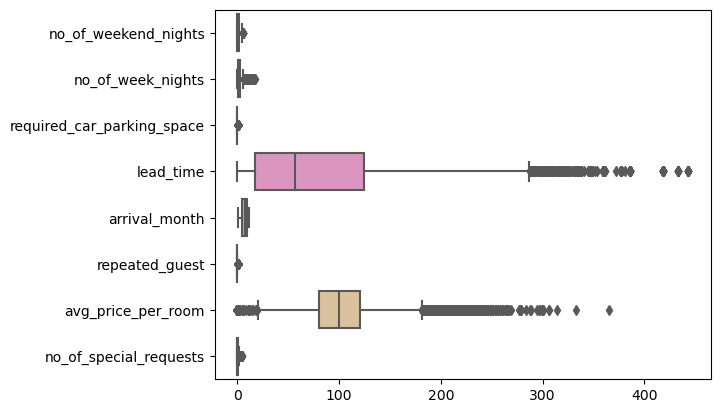

In [61]:
# visualizing outliers for All columns
ax = sns.boxplot(data=X_train, orient="h", palette="Set2")

okay now we will handle outlier to data type float or numerical continuous columns

In [62]:
# Show Data type
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27206 entries, 18478 to 17673
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no_of_weekend_nights        27206 non-null  int64  
 1   no_of_week_nights           27206 non-null  int64  
 2   type_of_meal_plan           27206 non-null  object 
 3   required_car_parking_space  27206 non-null  int64  
 4   lead_time                   27206 non-null  int64  
 5   arrival_month               27206 non-null  int64  
 6   market_segment_type         27206 non-null  object 
 7   repeated_guest              27206 non-null  int64  
 8   avg_price_per_room          27206 non-null  float64
 9   no_of_special_requests      27206 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 2.3+ MB


from information above we will handle outlier with lots of unique values

In [63]:
# Let's check whether a distribution is normal or not all columns

print('Distribution of column `no_of_weekend_nights`: ', X_train['no_of_weekend_nights'].skew())
print('Distribution of column `no_of_week_nights` : ', X_train['no_of_week_nights'].skew())
print('Distribution of column `lead_time` : ', X_train['lead_time'].skew())
print('Distribution of column `arrival_month` : ', X_train['arrival_month'].skew())
print('Distribution of column `repeated_guest` : ', X_train['repeated_guest'].skew())
print('Distribution of column `avg_price_per_room` : ', X_train['avg_price_per_room'].skew())
print('Distribution of column `no_of_special_requests` : ', X_train['no_of_special_requests'].skew())

Distribution of column `no_of_weekend_nights`:  0.7183013056277611
Distribution of column `no_of_week_nights` :  1.4856608752054041
Distribution of column `lead_time` :  1.300929223383215
Distribution of column `arrival_month` :  -0.34560081465019166
Distribution of column `repeated_guest` :  6.081103931170396
Distribution of column `avg_price_per_room` :  0.5983008821448975
Distribution of column `no_of_special_requests` :  1.1441190231555718


from information above the data with score between `-0.5` and `0.5` have gausian or normal distribution but if the data have score upper and lower that standard means data skew or have outlier. Here we will do capping method to handling outlier because we dont want to drop column anymore, the data gausian will count using `Gausian` and data skew using `IQR`

In [64]:
def handling_outliers(X_train, columns):
    for column in columns:
        # calculate Q1 and Q3 of the column
        Q1 = X_train[column].quantile(0.25)
        Q3 = X_train[column].quantile(0.75)
        IQR = Q3 - Q1

        # define the fences
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR

        # cap the outliers to the nearest actual data point
        X_train[column] = np.where(X_train[column] > upper_fence, upper_fence, 
                              np.where(X_train[column] < lower_fence, lower_fence, X_train[column]))
    
    return X_train
columns = ['no_of_weekend_nights','no_of_week_nights',
       'lead_time','arrival_month','repeated_guest',
       'avg_price_per_room','no_of_special_requests']
X_train_capped= handling_outliers(X_train,columns)
X_test_capped= handling_outliers(X_test,columns)

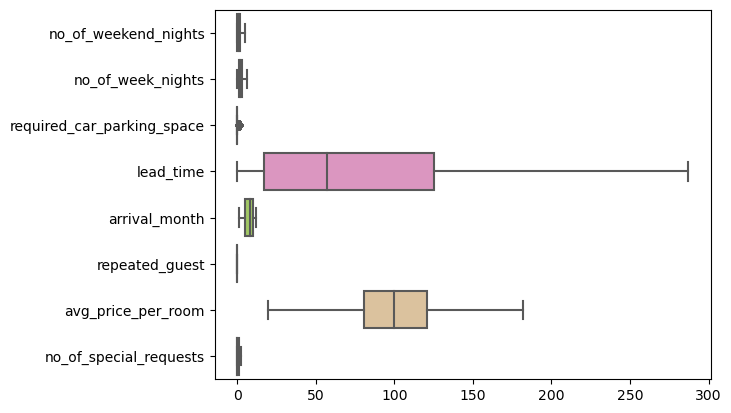

In [65]:
# visualizing clearing outlier
ax = sns.boxplot(data=X_train_capped, orient="h", palette="Set2")

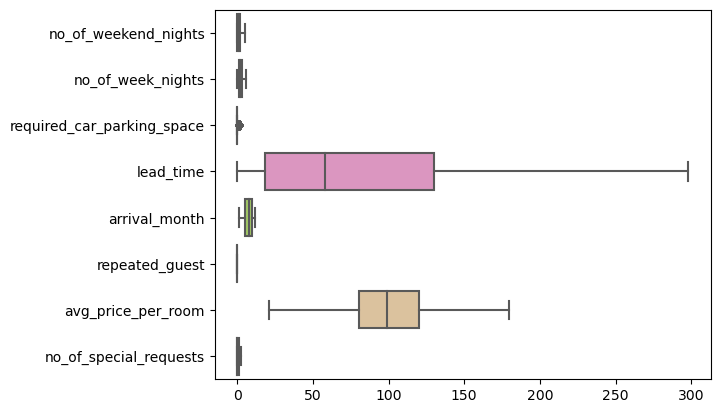

In [66]:
# visualizing clearing outlier
ax = sns.boxplot(data=X_test_capped, orient="h", palette="Set2")

In [67]:
# Show new Xtrain clean data frame from outlier 
X_train_capped.head()

,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_month,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests
18478,0.0,3.0,Meal Plan 1,0,20.0,9.0,Online,0.0,136.67,2.0
11575,1.0,4.0,Meal Plan 1,0,11.0,7.0,Offline,0.0,85.00,0.0
36108,2.0,2.0,Meal Plan 1,0,24.0,12.0,Online,0.0,95.20,1.0
23151,0.0,2.0,Meal Plan 1,0,188.0,6.0,Offline,0.0,130.00,0.0
19377,1.0,0.0,Meal Plan 1,0,286.0,10.0,Offline,0.0,90.00,0.0


In [68]:
# Show new Xtest clean data frame from outlier 
X_test_capped.head()

,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_month,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests
3052,2.0,3.0,Meal Plan 1,0,241.0,10.0,Online,0.0,150.45,1.0
1124,0.0,3.0,Not Selected,0,15.0,4.0,Online,0.0,117.67,0.0
4052,1.0,2.0,Not Selected,0,13.0,10.0,Online,0.0,140.00,2.0
29035,0.0,2.0,Meal Plan 1,0,4.0,12.0,Online,0.0,62.37,0.0
22362,2.0,6.0,Meal Plan 2,0,5.0,2.0,Online,0.0,146.00,0.0


After handling outlier we will define our first pipeline that is our scaler using Standard Scaler, then we weill continue this project enter to the next step `Model Definition`

This project using standard scaler for scaling method because here we dont want to change our dataset into range value (0,1) using `Min-Max Scaler `and we will use `One Hot Encoder` as Encoding method for our dataset because here in our data columns there are nominal categorical features.

In [69]:
#Define cat col,num col, dan numcat col
num_col =['no_of_week_nights', 'lead_time','avg_price_per_room','arrival_month']
cat_col= ['market_segment_type','type_of_meal_plan']
num_cat_col=['required_car_parking_space','repeated_guest','no_of_special_requests']
#Define num pipeline
num_pipeline= Pipeline([
    ('scaler',StandardScaler())])
#Define cat pipeline
cat_pipeline= Pipeline([
    ('encoder',OneHotEncoder())])

# Concate 2 pipeline
preprocessing_pipeline = ColumnTransformer([
    ('pipe_num',num_pipeline,num_col),
    ('pipe_cat',cat_pipeline,cat_col)
], remainder= 'passthrough')

preprocessing_pipeline.fit(X_train_capped)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['no_of_week_nights', 'lead_time',
                                  'avg_price_per_room', 'arrival_month']),
                                ('pipe_cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['market_segment_type', 'type_of_meal_plan'])])

---

# Bab 6: Model Definition

At this stage we will choose the best model to use in the analysis from 5 models, namely support vector machine (SVM), K-nearest neighbors (KNN), Decision Tree, Random Forest, and Boosting using a pipeline using

In [70]:
#Model Define
svm_model = SVC()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier(random_state=10)
rf_model = RandomForestClassifier(random_state=10)
ada_model = AdaBoostClassifier()


---

# Bab 7: Model Evaluation

In [71]:
# Function untuk performance check dan juga metrics f1_score
def performance_check(clf, X, y):
  y_pred = clf.predict(X)
  

  return f1_score(y, y_pred)

In [72]:
# Method 1 : Model training SVM using `Pipeline`
pipe_svm = Pipeline([
    ('preprocessing_pipeline',preprocessing_pipeline),
    ('svm', SVC())])
pipe_svm.fit(X_train_capped, y_train)

Pipeline(steps=[('preprocessing_pipeline',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_week_nights',
                                                   'lead_time',
                                                   'avg_price_per_room',
                                                   'arrival_month']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['market_segment_type',
                                                   'type_of_meal_plan'])])),
                ('svm', SVC())])

In [73]:
# Method 2 : Model training KNN using `Pipeline`
pipe_knn = Pipeline([
    ('preprocessing_pipeline',preprocessing_pipeline),
    ('knn', KNeighborsClassifier())])
pipe_knn.fit(X_train_capped, y_train)

Pipeline(steps=[('preprocessing_pipeline',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_week_nights',
                                                   'lead_time',
                                                   'avg_price_per_room',
                                                   'arrival_month']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['market_segment_type',
                                                   'type_of_meal_plan'])])),
                ('knn', KNeighborsClassifier())])

In [74]:
# Method 3 : Model training Decision Tree using `Pipeline`
pipe_dt = Pipeline([
    ('preprocessing_pipeline',preprocessing_pipeline),
    ('dt', DecisionTreeClassifier())])
pipe_dt.fit(X_train_capped, y_train)

Pipeline(steps=[('preprocessing_pipeline',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_week_nights',
                                                   'lead_time',
                                                   'avg_price_per_room',
                                                   'arrival_month']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['market_segment_type',
                                                   'type_of_meal_plan'])])),
                ('dt', DecisionTreeClassifier())])

In [75]:
# Method 4 : Model training Random Forest using `Pipeline`
pipe_rf = Pipeline([
    ('preprocessing_pipeline',preprocessing_pipeline),
    ('rf', RandomForestClassifier())])
pipe_rf.fit(X_train_capped, y_train)

Pipeline(steps=[('preprocessing_pipeline',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_week_nights',
                                                   'lead_time',
                                                   'avg_price_per_room',
                                                   'arrival_month']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['market_segment_type',
                                                   'type_of_meal_plan'])])),
                ('rf', RandomForestClassifier())])

In [76]:
# Method 5 : Model training Ada Boost using `Pipeline`
pipe_ada = Pipeline([
    ('preprocessing_pipeline',preprocessing_pipeline),
    ('Ada', AdaBoostClassifier())])
pipe_ada.fit(X_train_capped, y_train)

Pipeline(steps=[('preprocessing_pipeline',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_week_nights',
                                                   'lead_time',
                                                   'avg_price_per_room',
                                                   'arrival_month']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['market_segment_type',
                                                   'type_of_meal_plan'])])),
                ('Ada', AdaBoostClassifier())])

Before entering the next stage regarding combining the model we chose in the pipeline with hyperparameter tuning using the random search method, we will carry out cross validation for the five types of KNN, SVM,Decision Tree,Random Forest, and applying ensemble learning Boosting model in our best model to make our model stronger, stronger here means reduce the variance and bias of individual models, making the combined model more generalizable and better at handling different types of data.

---

# Bab 8: Model Evaluation

### Cross Validation

In [77]:
#Define SKfold
skfold = StratifiedKFold(n_splits=5)

In [78]:
#Define Cross Validation for each model
cv_svm_model = cross_val_score(pipe_svm, X_train_capped, y_train, cv=skfold, scoring= 'f1')
cv_knn_model = cross_val_score(pipe_knn,X_train_capped, y_train, cv=skfold, scoring= 'f1')
cv_dt_model = cross_val_score(pipe_dt, X_train_capped, y_train, cv=skfold, scoring= 'f1')
cv_rf_model = cross_val_score(pipe_rf,X_train_capped, y_train, cv=skfold, scoring= 'f1')
cv_ada_model = cross_val_score(pipe_ada,X_train_capped, y_train, cv=skfold, scoring= 'f1')

In [79]:
# Finding best model dengan for loop based on cross_val_score (mean)
name_model= []
cv_scores= 0
#Zip untuk memanggil gabungan dari data di atas dan di bawah 
# untuk cv,nama metric
for cv,name in zip([cv_svm_model,cv_ada_model,cv_knn_model,cv_dt_model,cv_rf_model],
                   ['svm_model','ada_model','knn_model','dt_model','rf_model']): #isi dari nama kolom yang mau di looping
    #Format Output Looping
    print(name)
    print('f1 score - All - Cross Validation:', cv)
    print('f1 score - mean - Cross Validation:',cv.mean())
    print('f1 score - std - Cross validation:', cv.std())
    print('f1 score - Range of Test Set:',(cv.mean()-cv.std()), '-' ,(cv.mean()+cv.std()))
    print('-'*50)

#Create a condition to find best model based on cv.mean ()
    if  cv.mean() > cv_scores:
        cv_scores = cv.mean()
        name_model = name

    else:
        pass

#Create a conclusion
print('Best Model:', name_model)
print('Cross Val Mean from Best Model:', cv_scores)

svm_model
f1 score - All - Cross Validation: [0.87908325 0.88690163 0.88221406 0.88103992 0.88315076]
f1 score - mean - Cross Validation: 0.8824779218918589
f1 score - std - Cross validation: 0.0025955044753826497
f1 score - Range of Test Set: 0.8798824174164762 - 0.8850734263672416
--------------------------------------------------
ada_model
f1 score - All - Cross Validation: [0.86263441 0.87183608 0.86650615 0.8663459  0.87150689]
f1 score - mean - Cross Validation: 0.8677658846275987
f1 score - std - Cross validation: 0.0034784164883290432
f1 score - Range of Test Set: 0.8642874681392697 - 0.8712443011159278
--------------------------------------------------
knn_model
f1 score - All - Cross Validation: [0.88984881 0.89618074 0.89058934 0.8917609  0.88820293]
f1 score - mean - Cross Validation: 0.8913165451494984
f1 score - std - Cross validation: 0.0026920461225627495
f1 score - Range of Test Set: 0.8886244990269356 - 0.8940085912720612
----------------------------------------------

Based on the cross validation above our best model is `Random Forest` model

F1 Score - Train Set  :  0.9946585272796643 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      8897
           1       0.99      1.00      0.99     18309

    accuracy                           0.99     27206
   macro avg       0.99      0.99      0.99     27206
weighted avg       0.99      0.99      0.99     27206
 

Confusion Matrix      : 


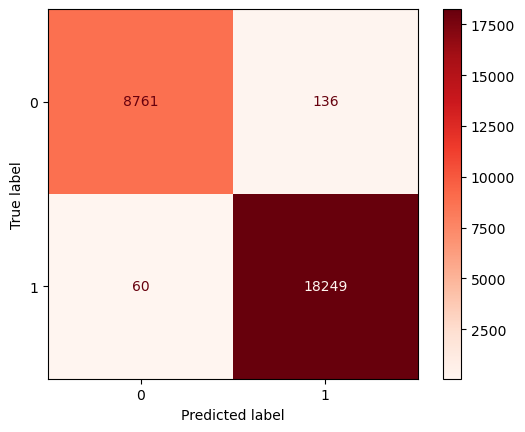

In [86]:
# Check Performance Model against Train-Set

y_pred_train = pipe_rf.predict(X_train_capped)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_rf, X_train_capped, y_train, cmap='Reds'))

From information above we can said our best model in train set is perfect has 99 score

F1 Score - Test Set  :  0.9242566243503451 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      2858
           1       0.91      0.94      0.92      5757

    accuracy                           0.90      8615
   macro avg       0.89      0.87      0.88      8615
weighted avg       0.90      0.90      0.90      8615
 

Confusion Matrix      : 


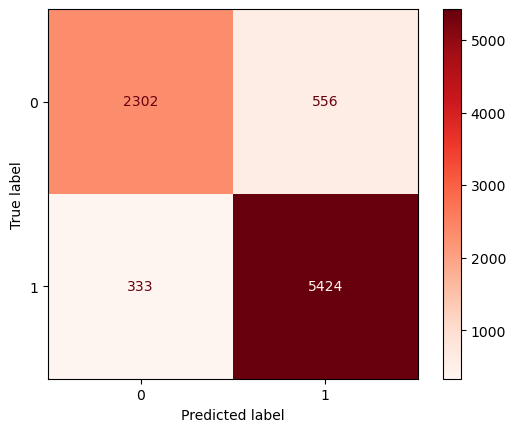

In [109]:
# Check Performance Model against Test-Set

y_pred_test = pipe_rf.predict(X_test_capped)

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_rf, X_test_capped, y_test, cmap='Reds'))

From information above we can see that our best model in test set is high too 92 for the score


In [92]:
# Save Classification Report into a Dictionary

all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.896808
test - f1_score,0.924257
test - precision,0.907023
test - recall,0.942157
train - accuracy,0.992796
train - f1_score,0.994659
train - precision,0.992603
train - recall,0.996723


now we will combine our best model with hyperparameter tuning random search to see the different before and after the model getting process with hyperparameter tuning, it expected will increase our best model F1_score  

In [111]:
#Pipeline Random Forest
random_search_params = {'rf__n_estimators':[1,10,100],
                        'rf__max_depth':[1,2,3,4,5],
                        'rf__random_state':[42]}

random_rf = RandomizedSearchCV(pipe_rf,param_distributions=random_search_params, n_iter=10,cv=5,random_state=42, scoring= 'f1')
random_rf.fit(X_train_capped, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing_pipeline',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['no_of_week_nights',
                                                                                'lead_time',
                                                                                'avg_price_per_room',
                                                                                'arrival_month']),
                                                                              ('pipe_cat',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder())]),
                                                                               ['market_segment_type',
                                                                                'type_of_meal_plan'])])),
                                             ('rf', RandomForestClassifier())]),
                   param_distributions={'rf__max_depth': [1, 2, 3, 4, 5],
                                        'rf__n_estimators': [1, 10, 100],
                                        'rf__random_state': [42]},
                   random_state=42, scoring='f1')

In [112]:
# Get Best Hyperparameters

best_params = random_rf.best_estimator_
best_params

Pipeline(steps=[('preprocessing_pipeline',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_week_nights',
                                                   'lead_time',
                                                   'avg_price_per_room',
                                                   'arrival_month']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['market_segment_type',
                                                   'type_of_meal_plan'])])),
                ('rf', RandomForestClassifier(max_depth=5, random_state=42))])

In [107]:
#Classification Report
y_pred_train = best_params.predict(X_train_capped)
y_pred_test = best_params.predict(X_test_capped)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.86      0.52      0.65      8897
           1       0.80      0.96      0.87     18309

    accuracy                           0.81     27206
   macro avg       0.83      0.74      0.76     27206
weighted avg       0.82      0.81      0.80     27206


Test
              precision    recall  f1-score   support

           0       0.85      0.51      0.64      2858
           1       0.80      0.95      0.87      5757

    accuracy                           0.81      8615
   macro avg       0.82      0.73      0.75      8615
weighted avg       0.81      0.81      0.79      8615



F1 Score - Test Set   :  0.8689120809614168 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.51      0.64      2858
           1       0.80      0.95      0.87      5757

    accuracy                           0.81      8615
   macro avg       0.82      0.73      0.75      8615
weighted avg       0.81      0.81      0.79      8615
 

Confusion Matrix      : 


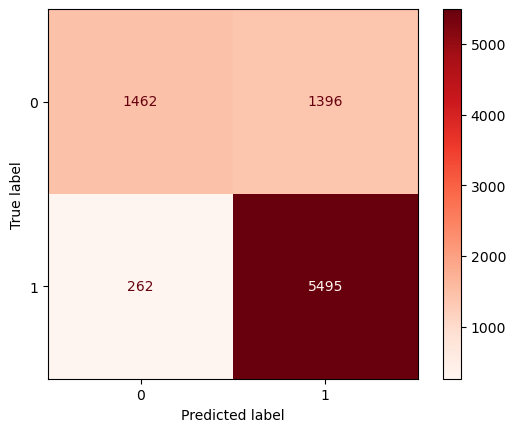

In [110]:
# Check Performance Model against Test-Set

y_pred_test = best_params.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_params, X_test, y_test, cmap='Reds'))

From the confusion metrics above we gain the information that our model test F1_Score is 87% that is good enough to be applied in the real case of hotel reservation, the confusion metrics above contain information like:
1. True Negatif (TN): the prediction said that there are `1462` visitors predicted will cancel their booking and in the real fact True so it is good because the prediction and the real fact is same
2. False Negatif (FN): the prediction said that there are `262` visitors predicted will cancel their booking and in real fact is not true or they not canceled their booking so that is not good because it can be said miss prediction and it can be as improvement to the next modeling to reduce this value of False Negatif, but if we look at the confusion metrics the False Negatif is the lowest value that indicate that this modeling is good enough but still need imporovment
3. False Positif (FP): the prediction said that there are `1396` visitors predicted will not canceled their booking but in real fact is they canceled their booking so that is not good too like False Negatif because it is miss prediction.
4. True Positif (TP): prediction said that there are `5496` visitors predicted will not canceled their booking but in real fact is true so it is good prediction and the value is the most than the other so that it is still good modeling like i said before

In [102]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Random Search')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Random Search
train - precision,0.992603,0.803865
train - recall,0.996723,0.958763
train - accuracy,0.992796,0.814820
train - f1_score,0.994659,0.874508
test - precision,0.907023,0.797417
test - recall,0.942157,0.954490
test - accuracy_score,0.896808,0.807545
test - f1_score,0.924257,0.868912


From the classification report it indicated that using hyperparameter in our best model decrese from our baseline model without using hyperparameter tuning, good news from our model has good fit data because there are no gap value of F1_score in train set dan test set or we can said the value is the same 87 that is good enough, good fit, and more consistant to be applied in real case although the baseline model have higher score than using hyperparameter tuning, so here in this project use best params as the best model

---

# Bab 9: Model Saving

In [103]:
# Save file inference
with open('best_param.pkl', 'wb') as file_1:
  pickle.dump(best_params, file_1)

In [104]:
# Save file preprocessing
with open('preprocessing_pipeline.pkl', 'wb') as file_2:
    pickle.dump(preprocessing_pipeline, file_2)

---

# Bab 10: Model Inference

Model Inference in notebook entitled PIM2_inf_Allen

---

# Bab 11: Conclusion

### Looking to EDA: 
- Visitors that not canceled their booking is bigger than canceled their booking 67.2% to 32.8%. We can take a look the comparison between the 
visitors that not canceled and canceled in how they chose meal plan, the meal plan 1 is occupied the first place
- Market segment of booking status majority from online
- The most chose room type is room type 1
- Visitors activity in reservation hotel, crowded in October 2018
### Cross Validation and Best Model:
-  After doing cross validation, Random Forest become the best model
-  Baseline Model getting value of F1_Score higher than using hyperparameter tuning
-  This project chose best params with hyperparameter tuning with random search although the value 0f F1_score decrease but the result is more `goodfit` because the train set dan test set is the same and dont have a gap with value of F1_Score 87 that is high and good enough as model learning to do a prediction but still have a lot of improvement for next model learning
### Confusion Metric:
1. True Negatif (TN): the prediction said that there are `1462` visitors predicted will cancel their booking and in the real fact True so it is good because the prediction and the real fact is same
2. False Negatif (FN): the prediction said that there are `262` visitors predicted will cancel their booking and in real fact is not true or they not canceled their booking so that is not good because it can be said miss prediction and it can be as improvement to the next modeling to reduce this value of False Negatif, but if we look at the confusion metrics the False Negatif is the lowest value that indicate that this modeling is good enough but still need imporovment
3. False Positif (FP): the prediction said that there are `1396` visitors predicted will not canceled their booking but in real fact is they canceled their booking so that is not good too like False Negatif because it is miss prediction.
4. True Positif (TP): prediction said that there are `5496` visitors predicted will not canceled their booking but in real fact is true so it is good prediction and the value is the most than the other so that it is still good modeling like i said before
### Insight Business   
- Based on the model inference this model is ready to predict customer or visitors about hotel reservation to detect the visitors want cancel or not their reservation, it is for sure will make effective and efficiency for hotel to prepare the stratetgy to reduce and minimalize the business loss by predicting the visitors by their activity and anticipate by giving their another option to make them not cancel their booking 
- Increasing services in Online platform because the most used by visitors is online platform
- Giving improvement like promo, discount, or renovation or renew the decoration of the hotel in the end of the year because it is time that is suitable for booking a hotel
### Improvement Model:
- Updating the visitors activity to get best prediction
- Increasing model in hyperparameter Tuning
- Handling Imbalance data to get better result